In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp "/content/drive/My Drive/SkinDataset/train_skin.zip" "train_skin.zip"
!cp "/content/drive/My Drive/SkinDataset/test.zip" "test.zip"

In [0]:
!cp "/c"

In [0]:
!unzip train_skin.zip
!unzip test.zip

Archive:  train_skin.zip
   creating: train/
   creating: train/Acne and Rosacea Photos/
  inflating: train/Acne and Rosacea Photos/07Acne081101.jpg  
  inflating: train/Acne and Rosacea Photos/07AcnePittedScars.jpg  
  inflating: train/Acne and Rosacea Photos/07AcnePittedScars1.jpg  
  inflating: train/Acne and Rosacea Photos/07PerioralDermEye.jpg  
  inflating: train/Acne and Rosacea Photos/07PerioralDermNose.jpg  
  inflating: train/Acne and Rosacea Photos/07PerioralDermq.jpg  
  inflating: train/Acne and Rosacea Photos/07PerioralSteroid1.jpg  
  inflating: train/Acne and Rosacea Photos/07PerlecheAccutane.jpg  
  inflating: train/Acne and Rosacea Photos/07Rhinophyma1.jpg  
  inflating: train/Acne and Rosacea Photos/07Rhinophyma1a.jpg  
  inflating: train/Acne and Rosacea Photos/07Rhinophymaq.jpg  
  inflating: train/Acne and Rosacea Photos/07rhnophymas032105.jpg  
  inflating: train/Acne and Rosacea Photos/07rhnophymas0321051.jpg  
  inflating: train/Acne and Rosacea Photos/07rosace

In [0]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Flatten

In [0]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(32,32,3))

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 6s 0us/step


In [0]:
classes = ['Acne and Rosacea Photos',
           'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
           'Eczema Photos',
           'Melanoma Skin Cancer Nevi and Moles',
           'Psoriasis pictures Lichen Planus and related diseases', 
           'Tinea Ringworm Candidiasis and other Fungal Infections',
           'Urticaria Hives', 
           'Nail Fungus and other Nail Disease']

In [0]:
for layer in base_model.layers[:-5]:
  layer.trainable = False

output = base_model.output
x = GlobalAveragePooling2D()(output)
x = Dense(1024, activation='relu')(x)
x = Dense(8, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

Found 7644 images belonging to 8 classes.
Found 2016 images belonging to 8 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
124/124 [==============================] - 74s 598ms/step - loss: 1.8890 - acc: 0.2443 - val_loss: 1.7556 - val_acc: 0.3011

Epoch 00001: val_loss improved from inf to 1.75562, saving model to vgg16_20epochs.h5
Epoch 2/20
124/124 [==============================] - 67s 537ms/step - loss: 1.6584 - acc: 0.3526 - val_loss: 1.5597 - val_acc: 0.4028

Epoch 00002: val_loss improved from 1.75562 to 1.55966, saving model to vgg16_20epochs.h5
Epoch 3/20
124/124 [==============================] - 68s 547ms/step - loss: 1.5316 - acc: 0.4201 - val_loss: 1.4898 - val_acc: 0.4519

Epoch 00003: val_loss improved from 1.55966 to 1.48980, saving model to vgg16_20epochs.h5
Epoch 4/20
124/124 [==============================] - 69s 555ms/step - loss: 1.4660 - acc: 0.4451 - val_loss: 1.6331 - val_acc: 0.4365

Epoch 00004: val_loss did not improve from 1.48980
Epoch 5

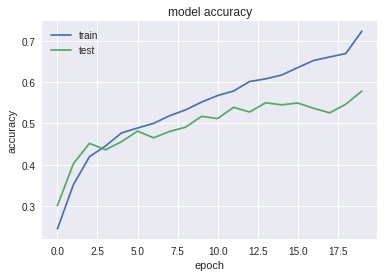

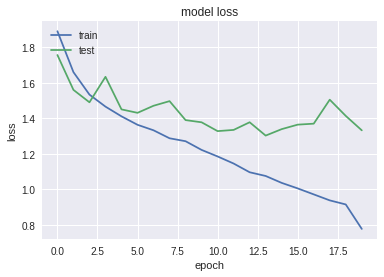

In [0]:
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline


lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.001, patience=5)

model_chkpt = ModelCheckpoint('vgg16_20epochs.h5',
                              monitor='val_loss', verbose=1, 
                              save_best_only=True)
batch_size = 32
nb_classes = 23
nb_epoch = 20
data_augmentation = True

# input image dimensions
img_rows, img_cols = 32, 32
# The CIFAR10 images are RGB.
img_channels = 3
train_path='/content/train'
test_path='/content/test'
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_data=train_datagen.flow_from_directory(train_path,classes=classes,target_size=(32,32),batch_size=62)
test_data=test_datagen.flow_from_directory(test_path,classes=classes,target_size=(32,32),batch_size=62)


# model = resnet.ResnetBuilder.build_resnet_18((img_channels, img_rows, img_cols), nb_classes)
# # model.summary()
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit_generator(train_data,steps_per_epoch=124,validation_data=test_data,validation_steps=33,epochs=20,verbose=1, callbacks=[lr_reducer, model_chkpt])
model.save('final_vgg1620epochs.h5')
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from keras.models import load_model
model = load_model('final_vgg1620epochs.h5', compile='True')
history=model.fit_generator(train_data,steps_per_epoch=124,validation_data=test_data,validation_steps=33,epochs=10,verbose=1, callbacks=[lr_reducer, model_chkpt])
model.save('final_vgg1630epochs.h5')
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/10
124/124 [==============================] - 75s 601ms/step - loss: 0.7040 - acc: 0.7513 - val_loss: 1.3076 - val_acc: 0.5898

Epoch 00001: val_loss did not improve from 1.30261
Epoch 2/10
124/124 [==============================] - 69s 554ms/step - loss: 0.6696 - acc: 0.7571 - val_loss: 1.3651 - val_acc: 0.5893

Epoch 00002: val_loss did not improve from 1.30261
Epoch 3/10
124/124 [==============================] - 69s 556ms/step - loss: 0.6428 - acc: 0.7653 - val_loss: 1.3838 - val_acc: 0.5923

Epoch 00003: val_loss did not improve from 1.30261
Epoch 4/10
124/124 [==============================] - 68s 548ms/step - loss: 0.6193 - acc: 0.7763 - val_loss: 1.4248 - val_acc: 0.5853

Epoch 00004: val_loss did not improve from 1.30261
Epoch 5/10
124/124 [==============================] - 68s 551ms/step - loss: 0.5879 - acc: 0.7865 - val_loss: 1.4518 - val_acc: 0.5938

Epoch 00005: val_loss did not improve from 1.30261
Epoch 6/10
124/124 [==============================] - 68s 552ms/s

KeyboardInterrupt: ignored

In [0]:
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import resnet
%matplotlib inline


lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.001, patience=5)

model_chkpt = ModelCheckpoint('resnet_50epochs.h5',
                              monitor='val_loss', verbose=1, 
                              save_best_only=True)
batch_size = 32
nb_classes = 22
nb_epoch = 20
data_augmentation = True

# input image dimensions
img_rows, img_cols = 32, 32
# The CIFAR10 images are RGB.
img_channels = 3
train_path='/content/train'
test_path='/content/test'
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_data=train_datagen.flow_from_directory(train_path,target_size=(32,32),batch_size=62)
test_data=test_datagen.flow_from_directory(test_path,target_size=(32,32),batch_size=62)


# model = resnet.ResnetBuilder.build_resnet_18((img_channels, img_rows, img_cols), nb_classes)
# # model.summary()
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history=model.fit_generator(train_data,steps_per_epoch=250,validation_data=test_data,validation_steps=65,epochs=50,verbose=1, callbacks=[lr_reducer, model_chkpt])
model.save('final_resnet50epochs.h5')
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Found 14471 images belonging to 22 classes.
Found 3730 images belonging to 22 classes.
Epoch 1/50
250/250 [==============================] - 159s 635ms/step - loss: 2.5703 - acc: 0.2829 - val_loss: 3.0819 - val_acc: 0.2220

Epoch 00001: val_loss improved from inf to 3.08191, saving model to resnet_50epochs.h5
Epoch 2/50
250/250 [==============================] - 141s 562ms/step - loss: 2.5103 - acc: 0.2985 - val_loss: 3.1536 - val_acc: 0.2147

Epoch 00002: val_loss did not improve from 3.08191
Epoch 3/50
250/250 [==============================] - 144s 578ms/step - loss: 2.4721 - acc: 0.3099 - val_loss: 3.1278 - val_acc: 0.2303

Epoch 00003: val_loss did not improve from 3.08191
Epoch 4/50
250/250 [==============================] - 143s 572ms/step - loss: 2.4497 - acc: 0.3150 - val_loss: 3.1530 - val_acc: 0.2288

Epoch 00004: val_loss did not improve from 3.08191
Epoch 5/50
249/250 [============================>.] - ETA: 0s - loss: 2.4382 - acc: 0.3174

KeyboardInterrupt: ignored

In [0]:
!rm -rf "train/"
!rm -rf "test/"